In [338]:
# We import the libraries that we will use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly as py



In [257]:
# We customize what we want to see
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [258]:
# We upload the data set, we call it "tiburon"
tiburon = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")
tiburon


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
#We get the info of the database to see the Dtype of lements we have. This might come in handy later on
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [260]:
#we cleant the data by first changing all the columns name special characters and spaces into " _ ", 
# this way we wont have any issue when manipulating columns.
#we first make a list with all the original colums, then we print them to see what we want to clean
#on the secon line of code, we replace them and obtain a dictionary with the old names and new names.
#we check again and see if there is any other special character to be cleaned.
columnas = list(tiburon.columns)
print(columnas)
tiburon_two = {columna: columna.replace(" ", "_").replace(".", "_").replace(":", "").lower() for columna in columnas}
print(tiburon_two)




['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
{'Case Number': 'case_number', 'Date': 'date', 'Year': 'year', 'Type': 'type', 'Country': 'country', 'Area': 'area', 'Location': 'location', 'Activity': 'activity', 'Name': 'name', 'Sex ': 'sex_', 'Age': 'age', 'Injury': 'injury', 'Fatal (Y/N)': 'fatal_(y/n)', 'Time': 'time', 'Species ': 'species_', 'Investigator or Source': 'investigator_or_source', 'pdf': 'pdf', 'href formula': 'href_formula', 'href': 'href', 'Case Number.1': 'case_number_1', 'Case Number.2': 'case_number_2', 'original order': 'original_order', 'Unnamed: 22': 'unnamed_22', 'Unnamed: 23': 'unnamed_23'}


In [261]:
# in this step we check the columns one by one to see that they are all understandable. 
#we can see that columns like "sex_" have an extra character that must be cleaned. This will be done manually
#It can also be done with Regex, but since its just a few, is faster manually
tiburon_two["Sex "] = "sex"
tiburon_two["Fatal (Y/N)"] = "fatal"
tiburon_two["Species "] = "species"



In [262]:
#we rename all columns from the dictionary tiburon_two into our dataset, calling it tiburon_renamed.
#we print the head to see that all columns have the correct number.
tiburon_renamed = tiburon.rename(columns=tiburon_two)
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
# we drop all duplicated rows, since we dont need duplicated data.
tiburon_renamed.drop_duplicates(inplace=True)

In [264]:
#We check the new shape
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
#Here we can sum all the nans inside the columns
tiburon_renamed.isna().sum()

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                6311
unnamed_23                6310
dtype: int64

In [266]:
#as we can see, unnamed 22 and 23 have 99% of the elements as NaN, so we can drop them
tiburon_renamed.drop(["unnamed_22", "unnamed_23"],axis=1,inplace=True)

In [267]:
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
# I want to eliminate columns that are the same, mainly because they are useless and take extra space and proccesing time
# This step could had been done before changing the variable names, but I prefer it in this order. 
# All comparison follow the same structure: Check the shape of the dataframe (6312 rows) 
# and see if we get the same amount of rows betwen two columns

In [269]:
# This is a bit confusing but here it goes:
# 1) After seeing the data head i realized that Date and Case_numbers are all dates that looks the same.
# 2) What I did was to check which rows does case_number and cas_number_2 are not the same, and we got 14 rows
# 3) I displayed them next to date, case_number, case_number_1 and case_number_2 and see if those 14 rows are also dates and similar.
# 4) The conclusion is that all case_number are the same as date and should be drop
tiburon_renamed[["date","case_number","case_number_1","case_number_2"]][(tiburon_renamed["case_number"])!=(tiburon_renamed["case_number_2"])].sample(14)

,date,case_number,case_number_1,case_number_2
8702,NaN,NaN,NaN,NaN
6306,NaN,0,NaN,NaN
6308,NaN,0,NaN,NaN
6303,NaN,0,NaN,NaN
390,10-Jul-2015,2015.07-10,2015.07.10,2015.07.10
25722,NaN,xx,NaN,NaN
6304,NaN,0,NaN,NaN
5944,May-1864,1864.05,1864.05.00,1864.05.00
6305,NaN,0,NaN,NaN
6307,NaN,0,NaN,NaN


In [270]:
# Since they al reflect date, we will erase all the case_number columns and leave only the date column
tiburon_renamed.drop(["case_number","case_number_1","case_number_2"],axis=1,inplace=True)

In [271]:
tiburon_renamed



,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
# I do this in order to see a cleaner dataframe
tiburon_renamed.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
1967,02-Ap-2001,2001.0,Unprovoked,BRAZIL,Rio Grande de Norte,"Praia de Camapum, Macau",Batin,A.C.C.,F,12,Left thigh bitten,N,NaN,NaN,M. Szpilman,2001.04.02.b-ACC.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4336.0
189,03-Jan-2017,2017.0,Invalid,AUSTRALIA,New South Wales,Merimbula,Wading,Mitchell Collins,M,20,Minor injuries to foot & toes,NaN,18h00,Shark involvement not confirmed,"Illawarra Mercury, 1/7/2017",2017.01.03-Collins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6114.0
4034,29-Dec-1959,1959.0,Boat,AUSTRALIA,Queensland,Scotts Point Beach,Paddling,"12' ski, occupants: Bill Dyer & Cliff Burgess",NaN,NaN,No injury to occupants,N,Afternoon,3.7 m [12'] tiger shark,"Herald, (Redcliffe), 12/31/1959",1959.12.29-Burgess-Dyer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2269.0
4618,06-Sep-1945,1945.0,Unprovoked,IRAN,Shatt-al-Arab River,Bashamir,Swimming,Hamid,M,13,"Right forearm injured, mid-humeral amputation",N,NaN,NaN,"A. Anderson, M.D. / Lt. Col. R.S. Hunt, Royal ...",1945.09.06-Hamid.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1685.0
5095,18-Nov-1928,1928.0,Provoked,USA,New Jersey,"Seabright, Monmouth County",Fishing,"boat, occupants: Captains Charles Anderson, Em...",M,NaN,"Fishermen were cut & bruised by netted, harpoo...",N,NaN,"""Blue nose sharks""",NY Herald Tribune,1928.11.18-SeaBright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1208.0
4179,1958,1958.0,Boat,SOUTH AFRICA,Western Cape Province,Plettenberg Bay,Fishing (trolling),ski-boat,NaN,NaN,No injury to occupants; shark bit propeller,N,NaN,White shark,"T. Wallett, p.27",1958.00.00.b-PlettenburgBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2124.0
3781,11-Nov-1962,1962.0,Unprovoked,USA,California,Farallon Islands,Spearfishing / Scuba diving (at surface),Leroy French,M,24,"Arm, hand, buttock, leg and thigh bitten",N,12h45 / 13h45,"White shark, 4.3 m to 4.9m [14' to 16']","D. Miller & R. Collier; R. Collier, pp.35-36; ...",1962.11.11-LeroyFrench_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2522.0
173,24-Feb-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Falcon Bay Beach, Mandurah",Surfing,male,M,NaN,"No injury, shark struck board",N,Morning,NaN,"Perth Now, 2/24/2017",2017.02.24-Mandurah,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6130.0
6181,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,122.0
2146,22-Dec-1998,1998.0,Unprovoked,AUSTRALIA,South Australia,Middleton Beach,Standing,Megan O'Leary,F,21,2 puncture wounds in left leg,N,15h30,NaN,"The Advertiser, 12/23/1998, p.3; Daily Telegra...",1998.12.22-O'Leary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4157.0


In [273]:
#here i count the amount of NaN that i have in each column
tiburon_renamed.isna().sum()


date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
original_order               3
dtype: int64

In [274]:
#I decided to drop all the columns that i wont use in my hypothesis
tiburon_clean = tiburon_renamed.drop(["species","time","original_order","href","href_formula","pdf","investigator_or_source"],axis=1)

In [275]:
#By making these lines of code, I can erase all the columns and rows where all values are NaN
tiburon_clean.dropna(axis=0, how='all',inplace=True)
tiburon_clean.dropna(axis=1, how='all',inplace=True)


In [276]:
tiburon_clean.activity.fillna("unknow",inplace=True)

In [277]:
#In this loop i can check the unique values of each column
# I then print al lvalues and see which function il lcreate to clean further
for i in tiburon_clean.keys():
    
    print(i, len(list(tiburon_clean[i].unique())))

date 5433
year 250
type 9
country 213
area 826
location 4109
activity 1533
name 5231
sex 7
age 158
injury 3738
fatal 9


In [278]:
set(list(tiburon_clean["date"].unique()))

{'24-Apr-2013',
 ' 07-Apr-1877',
 '26-Dec-1957',
 'Reported 14-Jul-1865',
 '04-Jan-2006',
 '26-Mar-1937',
 'Reported 11-Sep-1896',
 '21-Sep-1913',
 '1896',
 '12-May-1962',
 '27-Aug-1934',
 '25-Jul-1985',
 '23-Oct-1926',
 '10-Mar-1891',
 '11-Sep-2011',
 '20-Apr-1924',
 '1748',
 ' 2-Jul-1997',
 '18-Feb-1986',
 '24-May-1950',
 '21-Feb-2017',
 '03-Dec-1959',
 '14-Jun-1931',
 '29-Nov-1891',
 '13-Dec-1929',
 '26-Aug-1962',
 'Reported 22-Apr-1830',
 '03-Jun-1989',
 '18-Mar-2017',
 '12-Nov-2011',
 'Ca. 1881',
 '24-Sep-2005',
 '06-Dec-2011',
 ' 11-Mar-1877',
 '07-Jul-1937',
 '10-Jan-1996',
 'Ca. 1839',
 'Reported 31-Jul-1911',
 '24-Nov-2008',
 '02-Jun-2004',
 '03-Apr-1958',
 '21-Dec-1952',
 'Ca. 1939',
 'Reported 05-Sep-1906',
 '06-Aug-1950',
 '14-Apr-1961',
 '24-Jan-2009',
 '13-Aug-2000',
 '20-Mar-1935',
 'Jul-1964',
 '05-Oct-2011',
 '27-Dec-2008',
 '18-Mar-2009',
 'Dec-1993',
 '06-Apr-2009',
 'Reported 16-Sep-1845',
 '20-Sep-2015',
 '19-Nov-1975',
 '28-Sep-1974',
 '26-Jan-1912',
 '28-May-1965

In [279]:
def clean_date(x):
    if "jan" in x or "Jan" in x:
        return "January"
    elif "feb" in x or "Feb" in x:
        return "February"
    elif "mar" in x or "Mar" in x:
        return "March" 
    elif "apr" in x or "Apr" in x:
        return "April"
    elif "may" in x or "May" in x:
        return "May" 
    elif "jun" in x or "Jun" in x:
        return "June"
    elif "jul" in x or "Jul" in x:
        return "July" 
    elif "aug" in x or "Aug" in x:
        return "August"
    elif "sep" in x or "Sep" in x:
        return "September" 
    elif "oct" in x or "Oct" in x:
        return "October"
    elif "nov" in x or "Nov" in x:
        return "November" 
    elif "dec" in x or "Dec" in x:
        return "December"
    else: 
        return "unknow" 

In [280]:
tiburon_clean["clean_date"] = tiburon_clean.date.apply(clean_date)


In [281]:
set(list(tiburon_clean["clean_date"].unique()))

{'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September',
 'unknow'}

In [333]:
set(list(tiburon_clean["type"].unique()))
tiburon_clean["type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [283]:
set(list(tiburon_clean["country"].unique()))

{' PHILIPPINES',
 ' TONGA',
 'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH PO

In [284]:
def regex_activity(x):
    return "".join(re.findall(r'\b(\w+ing)\b',x)).lower()


In [285]:
tiburon_clean["activity_verb"] = tiburon_clean.activity.apply(regex_activity)

In [286]:
set(list(tiburon_clean["activity_verb"].unique()))


{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'attemptingdrowning',
 'attemptingfishing',
 'attemptingsailing',
 'attemptingswimming',
 'awaiting',
 'bathing',
 'bathingstanding',
 'bathingsurfing',
 'bathingswimming',
 'bathingwashing',
 'bathingwhaling',
 'being',
 'beingfishing',
 'bending',
 'boarding',
 'boardingsurfing',
 'boardingswimming',
 'boardingwading',
 'boating',
 'bodyboarding',
 'bodysurfing',
 'boeing',
 'bringing',
 'burning',
 'canoeing',
 'carrying',
 'casting',
 'catching',
 'chasingbathingriding',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'clingingrowing',
 'collecting',
 'coming',
 'competingfishing',
 'competingrowing',
 'competingspearfishingtowing',
 'competingstanding',
 'conducting',
 'crabbing',
 'crabbingspearing',
 'crawling',
 'crayfishing',
 'crossing',
 'crossingfighting',
 'crossingswimming',
 'crouching',
 'cruising',
 'cutting

In [288]:
nowater =[]

In [289]:
def activity_grouping(x):
    if "swimming" in x or "diving" in x or "snorkel" in x or "drown" in x or "float" in x:
        return "swimming"
    elif "surfing" in x or "board" in x or "paddl" in x: 
        return "surfing"
    elif "netting" in x or "fishing" in x or "shell" in x or "oyster" in x or "lobster" in x or "pearl" in x or "spear" in x or "harpoon" in x or "crab" in x or "shrimp" in x:
        return "fishing"
    elif "yacht" in x or "boat" in x or "kayak" in x or "canoe" in x or "kakay" in x or "sail" in x or "sink" in x or "ski" in x or "row" in x:
        return "vessel related"
    elif "collecting" in x or "washing" in x or "wading" in x or "stand" in x or "knee" in x or "walking" in x or "splash" in x or "bath" in x or "sitting" in x or "tread" in x:
        return "Close to the water"
    else:
        nowater.append(x)
        return "other activity"

In [290]:
tiburon_clean["activity_verb2"] = tiburon_clean.activity_verb.apply(activity_grouping)

In [291]:
set(list(tiburon_clean["activity_verb2"].unique()))

{'Close to the water',
 'fishing',
 'other activity',
 'surfing',
 'swimming',
 'vessel related'}

In [292]:
tiburon_clean["activity_verb2"].value_counts()

swimming              1836
other activity        1294
surfing               1288
fishing               1141
Close to the water     594
vessel related         149
Name: activity_verb2, dtype: int64

In [331]:
set(list(nowater))



{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'awaiting',
 'being',
 'bending',
 'boeing',
 'bringing',
 'burning',
 'carrying',
 'casting',
 'catching',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'coming',
 'conducting',
 'crawling',
 'crossing',
 'crossingfighting',
 'crouching',
 'cruising',
 'cutting',
 'dangling',
 'defecating',
 'deserting',
 'dismantling',
 'ditching',
 'dragging',
 'drawing',
 'dropping',
 'during',
 'duringfilming',
 'dynamiting',
 'escaping',
 'escapingblackbirding',
 'examining',
 'exercising',
 'expecting',
 'feeding',
 'feeling',
 'fighting',
 'filming',
 'filmingcarrying',
 'filmingfeeding',
 'finning',
 'fleeing',
 'flying',
 'footing',
 'foundering',
 'gaffing',
 'gaffingattemptingbring',
 'gathering',
 'gigging',
 'grabbing',
 'guarding',
 'hanging',
 'harassing',
 'hauling',
 'helping',
 'hiking',
 'holding',
 'holdingdangling',
 

In [294]:
tiburon_clean[tiburon_clean["activity_verb"] == "murdering"]


,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
5839,13-Oct-1878,1878.0,Unprovoked,NaN,NaN,NaN,Jumped overboard after murdering 2 shipmates,Sherrington,M,NaN,FATAL,Y,October,murdering,other activity


In [295]:
tiburon_clean[tiburon_clean["activity_verb"] == "defecating"]

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
4488,1950 - 1951,1950.0,Unprovoked,LIBERIA,Montserrado,Monrovia,Defecating in water beneath the docks,a dock worker,M,NaN,FATAL,Y,unknow,defecating,other activity


In [296]:
tiburon_clean[tiburon_clean['activity_verb'].str.contains('sleeping')==True]

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
2387,24-May-1995,1995.0,Unprovoked,FIJI,Yasawa Islands,Waya Island,Sleeping in anchored boat,Kinijioji Vindovi,M,69,"FATAL, hand & leg severely injured by shark th...",Y,May,sleeping,other activity


In [297]:
# Here we changed all the nan to the word we wanted
tiburon_clean.sex.fillna("unknow",inplace=True)

In [298]:
# here we modified one speceific column with the info we want, getting rid of spaces
tiburon_clean.sex = tiburon_clean.sex.str.strip()

In [299]:
# we make a dict with the key an value that we want to change
cleandict = {".":"unknow","lli":"unknow","N":"M"}
tiburon_clean.sex = tiburon_clean.sex.replace(cleandict)

In [300]:
set(list(tiburon_clean["sex"].unique())) 
       

{'F', 'M', 'unknow'}

In [301]:
tiburon_clean.age.fillna("unknow",inplace=True)

In [302]:
#Ricardo, esto fue lo que hiciste: primero querias limpiar la data a numeros asi que en regex usuaste: 
# re.findall(r'\b\d+\b',x)
#Luego para que esa lista pasara a integros usaste: [int(i) for i in re.findall(r'\b\d+\b',x)]
#Para sacar la media en np colocaste: np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])
#por ultimo, para no tener float colocaste: int()

#ok, por que los loops? pues facil, te diste cuenta que la lsita peude estar vacia y que te daba error
#por el mean, asi que le pediste que si la lista estaba vacia pues te diera unknow, sino, lo de arriba
def regex_age(x):
    if "month" in x:
        return "unknow"
    else:
        if [int(i) for i in re.findall(r'\b\d+\b',x)] == []:
            return "unknow"
        else:
            return int(np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])) 

In [303]:
tiburon_clean["age_2"] = tiburon_clean.age.apply(regex_age)

In [304]:
set(list(tiburon_clean["age_2"].unique()))

{1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 8,
 81,
 82,
 84,
 86,
 87,
 9,
 'unknow'}

In [305]:
tiburon_clean.fatal.fillna("unknow",inplace=True)

In [306]:
tiburon_clean.fatal = tiburon_clean.fatal.str.strip()

In [307]:
dict_fatal = {"2017":"unknow","M":"N","UNKNOWN":"unknow","y":"Y"}
tiburon_clean.fatal = tiburon_clean.fatal.replace(dict_fatal)

In [308]:
set(list(tiburon_clean["fatal"].unique()))

{'N', 'Y', 'unknow'}

In [309]:
tiburon_clean.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2,age_2
6114,11-May-1817,1817.0,Unprovoked,SRI LANKA,Western Province,Colombo,Swimming,William May,M,22,FATAL,Y,May,swimming,swimming,22
1575,22-Jun-2005,2005.0,Unprovoked,VANUATU,Malampa Province,Atchin Island off Malakula,Swimming,Alysha Margaret Webster,F,7,FATAL,Y,June,swimming,swimming,7
2512,02-Jan-1993,1993.0,Unprovoked,USA,Oregon,"Bastendorf Beach, Coos County",Surfing,William Weaver,M,29,"No injury, shark bit board",N,January,surfing,surfing,29
3402,23-Jan-1970,1970.0,Unprovoked,MOZAMBIQUE,Limpopo River,"Gijana, 150 km inland",Swimming,Mabua Mogadura,M,12,"Arm severed, thigh bitten",N,January,swimming,swimming,12
2446,07-Mar-1994,1994.0,Provoked,USA,California,NaN,Removing shark from tank in nightclub,Steve Rosebloome,M,33,Arm lacerated by captive shark PROVOKED INCIDENT,N,March,removing,other activity,33
5324,Reported 15-May-1915,1915.0,Invalid,EGYPT,NaN,Alexandria,Fell overboard,male,M,unknow,Shark involvement not confirmed,unknow,May,,other activity,unknow
1560,14-Aug-2005,2005.0,Invalid,SOUTH AFRICA,Western Cape Province,"Milnerton Lagoon, Cape Town",unknow,NaN,unknow,unknow,Human foot recovered from the water,unknow,August,,other activity,unknow
1916,22-Aug-2001,2001.0,Unprovoked,USA,Florida,"Daytona, Volusia County",Surfing,Lowell Lutz,M,17,Foot lacerated,N,August,surfing,surfing,17
3846,14-Jan-1962,1962.0,Unprovoked,USA,California,Farallon Islands,Spearfishing / Scuba diving (at surface),"Floyd Pair, Jr.",M,29,Buttock bitten & major leg wound,N,January,spearfishingdiving,swimming,29
4383,Reported 19-Mar-1953,1953.0,Unprovoked,AUSTRALIA,South Australia,"Schnapper Rock, Kirton Point",Spearfishing,Michael Leech,M,unknow,Abrasion,N,March,spearfishing,fishing,unknow


In [310]:
tiburon_hipotesis = tiburon_clean.drop(["location","date","activity","activity_verb","year","area","name","type","age"],axis=1)

In [311]:
tiburon_hipotesis.isna().sum()

country           50
sex                0
injury            28
fatal              0
clean_date         0
activity_verb2     0
age_2              0
dtype: int64

In [312]:
# La data lista para empezar a testear las hipotesis

tiburon_hipotesis = tiburon_hipotesis[['clean_date', 'country', 'age_2','sex', 'injury','fatal','activity_verb2']]

In [313]:
tiburon_hipotesis

,clean_date,country,age_2,sex,injury,fatal,activity_verb2
0,June,USA,57,F,"No injury to occupant, outrigger canoe and pad...",N,surfing
1,June,USA,11,F,Minor injury to left thigh,N,Close to the water
2,June,USA,48,M,Injury to left lower leg from surfboard skeg,N,surfing
3,June,AUSTRALIA,unknow,M,Minor injury to lower leg,N,surfing
4,June,MEXICO,unknow,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,swimming
...,...,...,...,...,...,...,...
6297,unknow,AUSTRALIA,unknow,M,FATAL,Y,swimming
6298,unknow,AUSTRALIA,unknow,M,FATAL,Y,swimming
6299,unknow,USA,unknow,M,FATAL,Y,swimming
6300,unknow,PANAMA,unknow,M,FATAL,Y,other activity


In [314]:
dfage = tiburon_hipotesis["age_2"][tiburon_hipotesis["age_2"] != "unknow"]

In [315]:
dfsex = tiburon_hipotesis["sex"][tiburon_hipotesis["sex"] != "unknow"]

In [316]:
dffatal = tiburon_hipotesis["fatal"][tiburon_hipotesis["fatal"] != "unknow"]

In [317]:
dfact = tiburon_hipotesis["activity_verb2"][tiburon_hipotesis["activity_verb2"] != "other"]

In [318]:
dfdate = tiburon_hipotesis["clean_date"][tiburon_hipotesis["clean_date"] != "unknow"]

In [319]:
# las 6 variables de arriba son las limpias

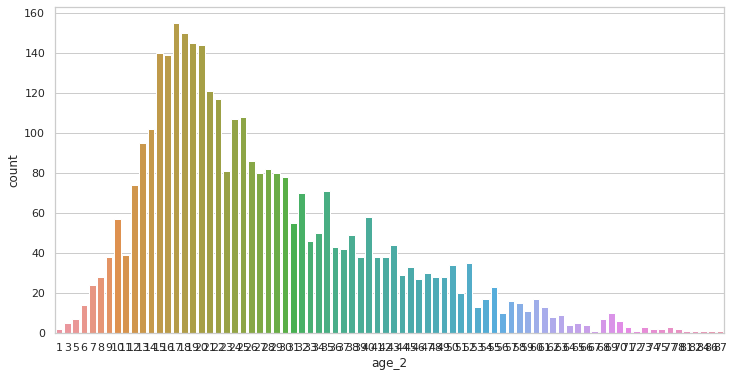

In [320]:
sns.countplot(x=dfage);

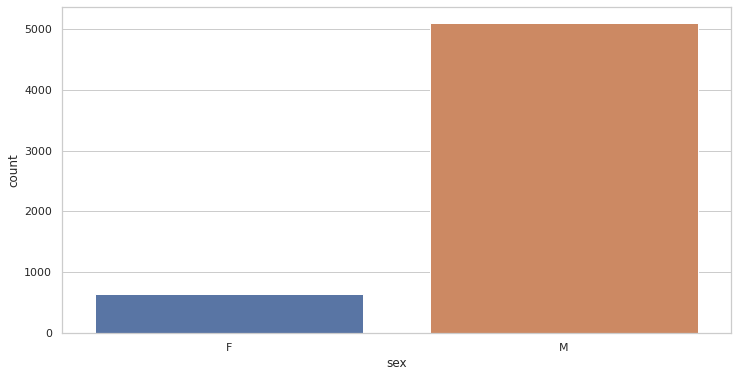

In [321]:
sns.countplot(x=dfsex);

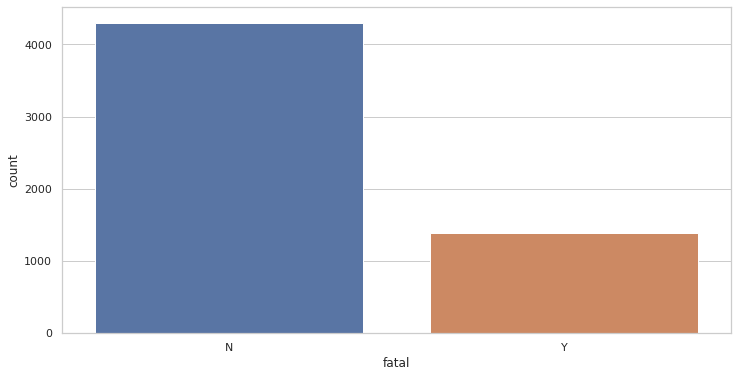

In [322]:
sns.countplot(x=dffatal);

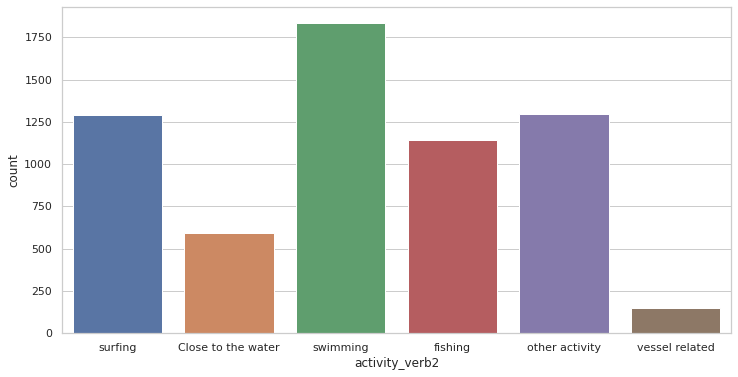

In [323]:
sns.countplot(x=dfact);

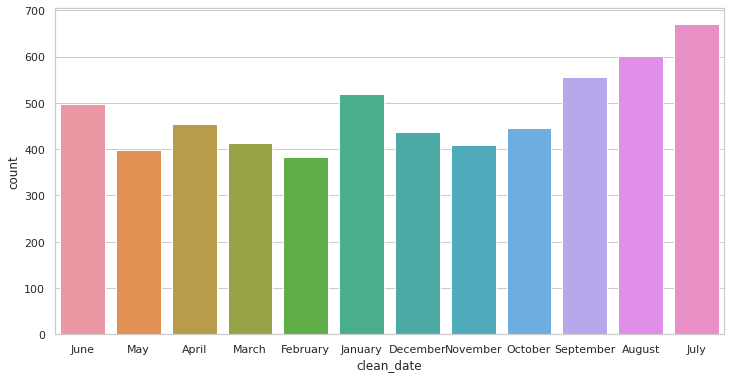

In [324]:
sns.countplot(x=dfdate);

<AxesSubplot:ylabel='sex'>

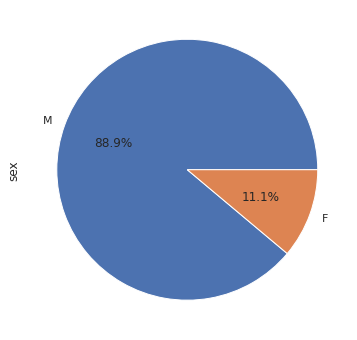

In [325]:
dfsex.value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='age_2'>

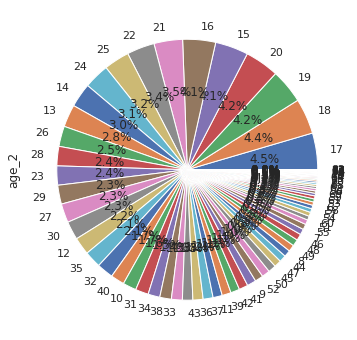

In [326]:
dfage.value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='fatal'>

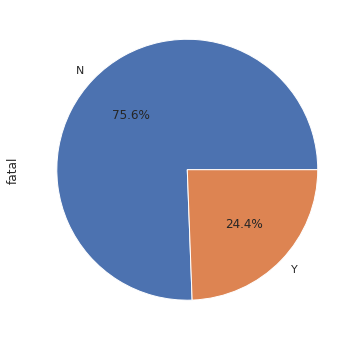

In [327]:
dffatal.value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='activity_verb2'>

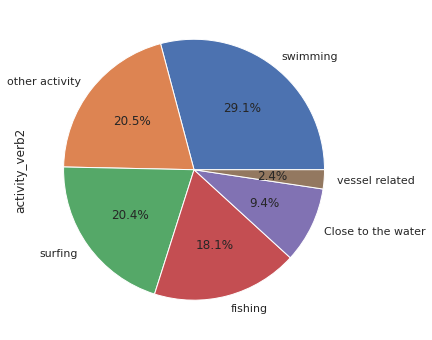

In [328]:
dfact.value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='clean_date'>

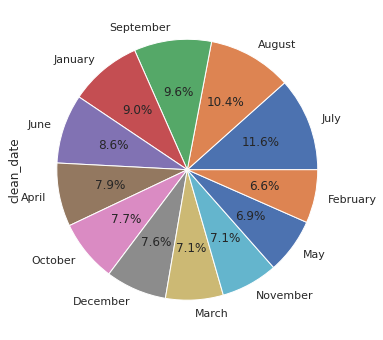

In [329]:
dfdate.value_counts().plot.pie(autopct="%.1f%%")

In [334]:
tiburon_hipotesis

,clean_date,country,age_2,sex,injury,fatal,activity_verb2
0,June,USA,57,F,"No injury to occupant, outrigger canoe and pad...",N,surfing
1,June,USA,11,F,Minor injury to left thigh,N,Close to the water
2,June,USA,48,M,Injury to left lower leg from surfboard skeg,N,surfing
3,June,AUSTRALIA,unknow,M,Minor injury to lower leg,N,surfing
4,June,MEXICO,unknow,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,swimming
...,...,...,...,...,...,...,...
6297,unknow,AUSTRALIA,unknow,M,FATAL,Y,swimming
6298,unknow,AUSTRALIA,unknow,M,FATAL,Y,swimming
6299,unknow,USA,unknow,M,FATAL,Y,swimming
6300,unknow,PANAMA,unknow,M,FATAL,Y,other activity


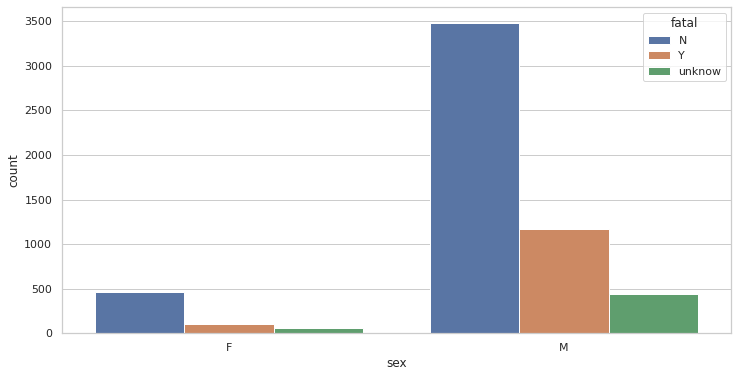

In [370]:
sns.countplot(x=dfsex, hue="fatal", data=tiburon_hipotesis);

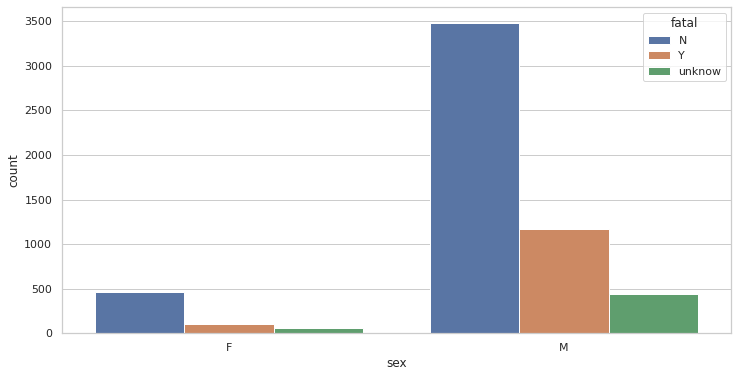

In [369]:
sns.countplot(x=dfsex, hue="fatal", data=tiburon_hipotesis);

In [367]:
dfsex

0       F
1       F
2       M
3       M
4       M
       ..
6297    M
6298    M
6299    M
6300    M
6301    M
Name: sex, Length: 5735, dtype: object

In [368]:
dffatal

0       N
1       N
2       N
3       N
4       N
       ..
6297    Y
6298    Y
6299    Y
6300    Y
6301    Y
Name: fatal, Length: 5691, dtype: object